In [39]:
import sys
sys.path.append('../')

from datetime import date, timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
from scripts.simulator import VariableLocalTransaction
from scripts.price_data.get_price import GetPriceData

price_getter = GetPriceData()

from pprint import pprint

## 1. Portfolios

In [34]:
portfolio_A

NameError: name 'portfolio_A' is not defined

## 2. Price Difference Examples

### NVIDIA

In [66]:
nvidia = "NVDA"
start_date = date(2022, 4, 1)
end_date = date(2022, 6, 1)
start_date_delay1 = date(2022, 3, 31)
end_date_delay1 = date(2022, 5, 31)
start_date_delay3 = date(2022, 3, 29)
end_date_delay3 = date(2022, 5, 29)

# def date_range(start, end):
#         for n in range(int((end - start).days) - 1):
#             yield start + timedelta(n + 1)

# prices = pd.Series([])
# for _date in date_range(start_date, end_date):
    

# prices = price_getter.get_close_price_all(nvidia, start_date, end_date)
# prices_delay = price_getter.get_close_price_all(nvidia, start_date_delay, end_date_delay)
# plt.figure(figsize=(30,10))
# plt.plot(price_getter.get_close_price_all(nvidia, start_date, end_date))
# # plt.plot(price_getter.get_close_price_all(nvidia, start_date_delay, end_date_delay))
# price_getter.get_close_price(nvidia, date(2022, 4, 1))

In [73]:
def date_range(start, end):
        for n in range(int((end - start).days) - 1):
            yield start + timedelta(n + 1)

prices = pd.Series([], index=[], dtype='float64')
for _date in date_range(start_date, end_date):
    _price = price_getter.get_close_price(nvidia, _date)
    prices = pd.concat([prices, pd.Series([_price], index=[_date])])
#     prices.append()
prices_delay3 = pd.Series([], index=[], dtype='float64')
for _date in date_range(start_date_delay3, end_date_delay3):
    _price = price_getter.get_close_price(nvidia, _date)
    prices_delay3 = pd.concat([prices_delay3, pd.Series([_price], index=[_date])])

prices_delay1 = pd.Series([], index=[], dtype='float64')
for _date in date_range(start_date_delay1, end_date_delay1):
    _price = price_getter.get_close_price(nvidia, _date)
    prices_delay1 = pd.concat([prices_delay1, pd.Series([_price], index=[_date])])

In [75]:
print(len(prices))
print(len(prices_delay3))
print(len(prices_delay1))

60
60
60


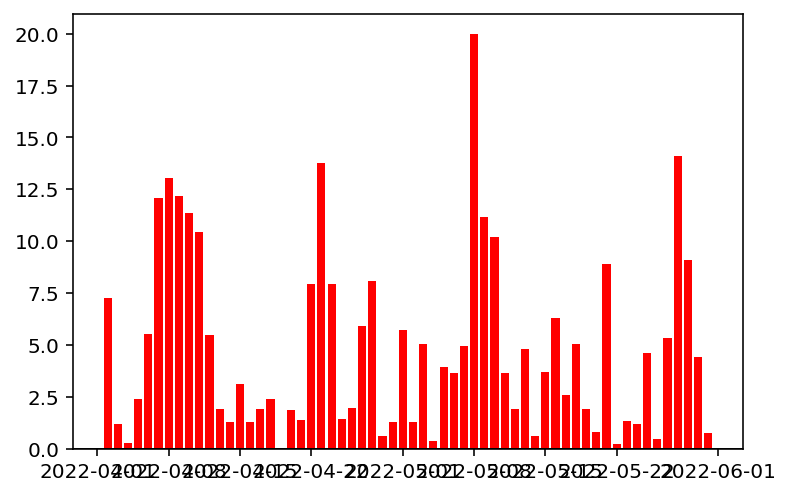

In [76]:
date_list = prices.index
# plt.plot(date_list, prices)
price_diffs1 = abs(prices.values - prices_delay1.values) / prices.values * 100
price_diffs3 = abs(prices.values - prices_delay3.values) / prices.values * 100
price_diffs_color = ["red" if price_diff < 0 else "blue" for price_diff in price_diffs]
plt.bar(date_list, price_diffs, color='red')
plt.axhline(0, color='black')

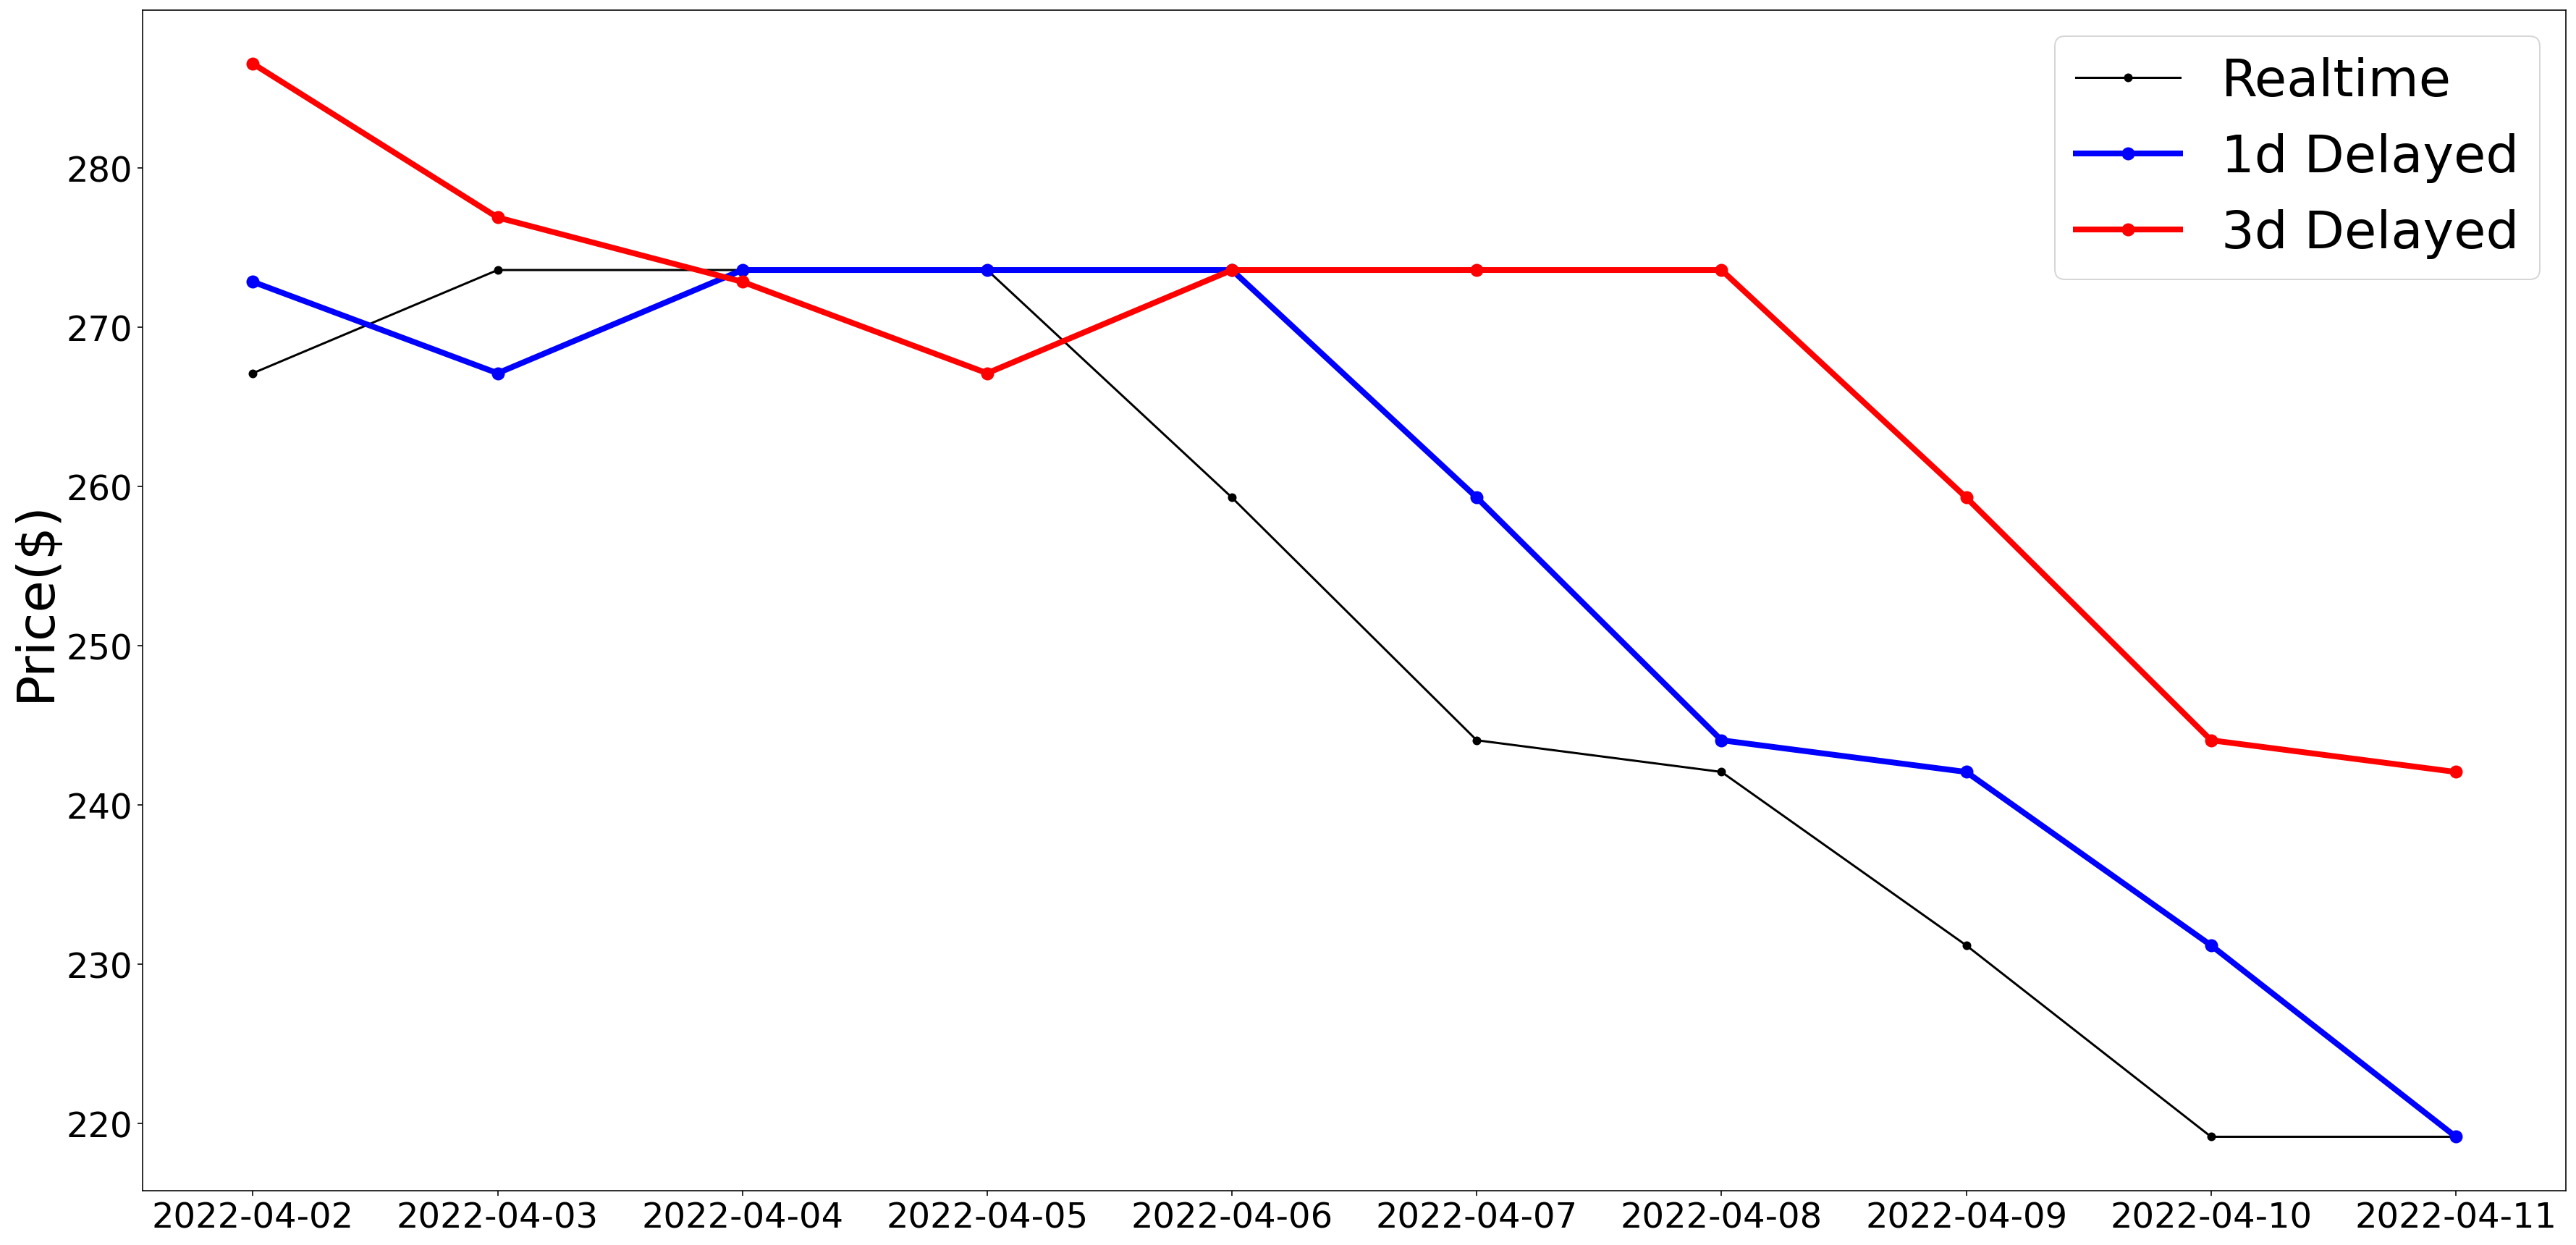

In [98]:
# plt.title('NVIDIA', fontsize=30, pad=20, fontname="Hiragino Sans")
# plt.figure(figsize=(30,20))
fig, ax1 = plt.subplots(figsize=(30,15))
# ax2 = ax1.twinx()

# ax1.set_xlabel('Date', fontsize=28)  # x軸ラベル
ax1.tick_params(axis='x', labelsize=24)
ax1.set_ylabel('Price($)', fontsize=36)  # y軸ラベル
ax1.tick_params(axis='y', labelsize=24)
# ax1.set_title('NVIDIA', fontsize=32) # グラフタイトル
ax1.plot(date_list[:10], prices[:10], color="black", marker='o', markersize=5, label="Realtime")
ax1.plot(date_list[:10], prices_delay1[:10].values, marker='o', markersize=8, linewidth=4, color="blue", label="1d Delayed")
ax1.plot(date_list[:10], prices_delay3[:10].values, marker='o', markersize=8, linewidth=4, color="red", label="3d Delayed")
ax1.legend(loc=0, fontsize=36)    # 凡例
# ax1.set_ylim(130, 290)
# plt.rcParams['fontsize'] = 25

# ax2.bar(date_list, price_diffs1, color='blue')
# ax2.bar(date_list, price_diffs3, color='red')
# ax2.set_ylabel('Price Difference(%)', fontsize=36)
# ax2.tick_params(axis='y', labelsize=24)
# ax2.set_ylim(0, 100)
# ax2.axhline(0, color='black')

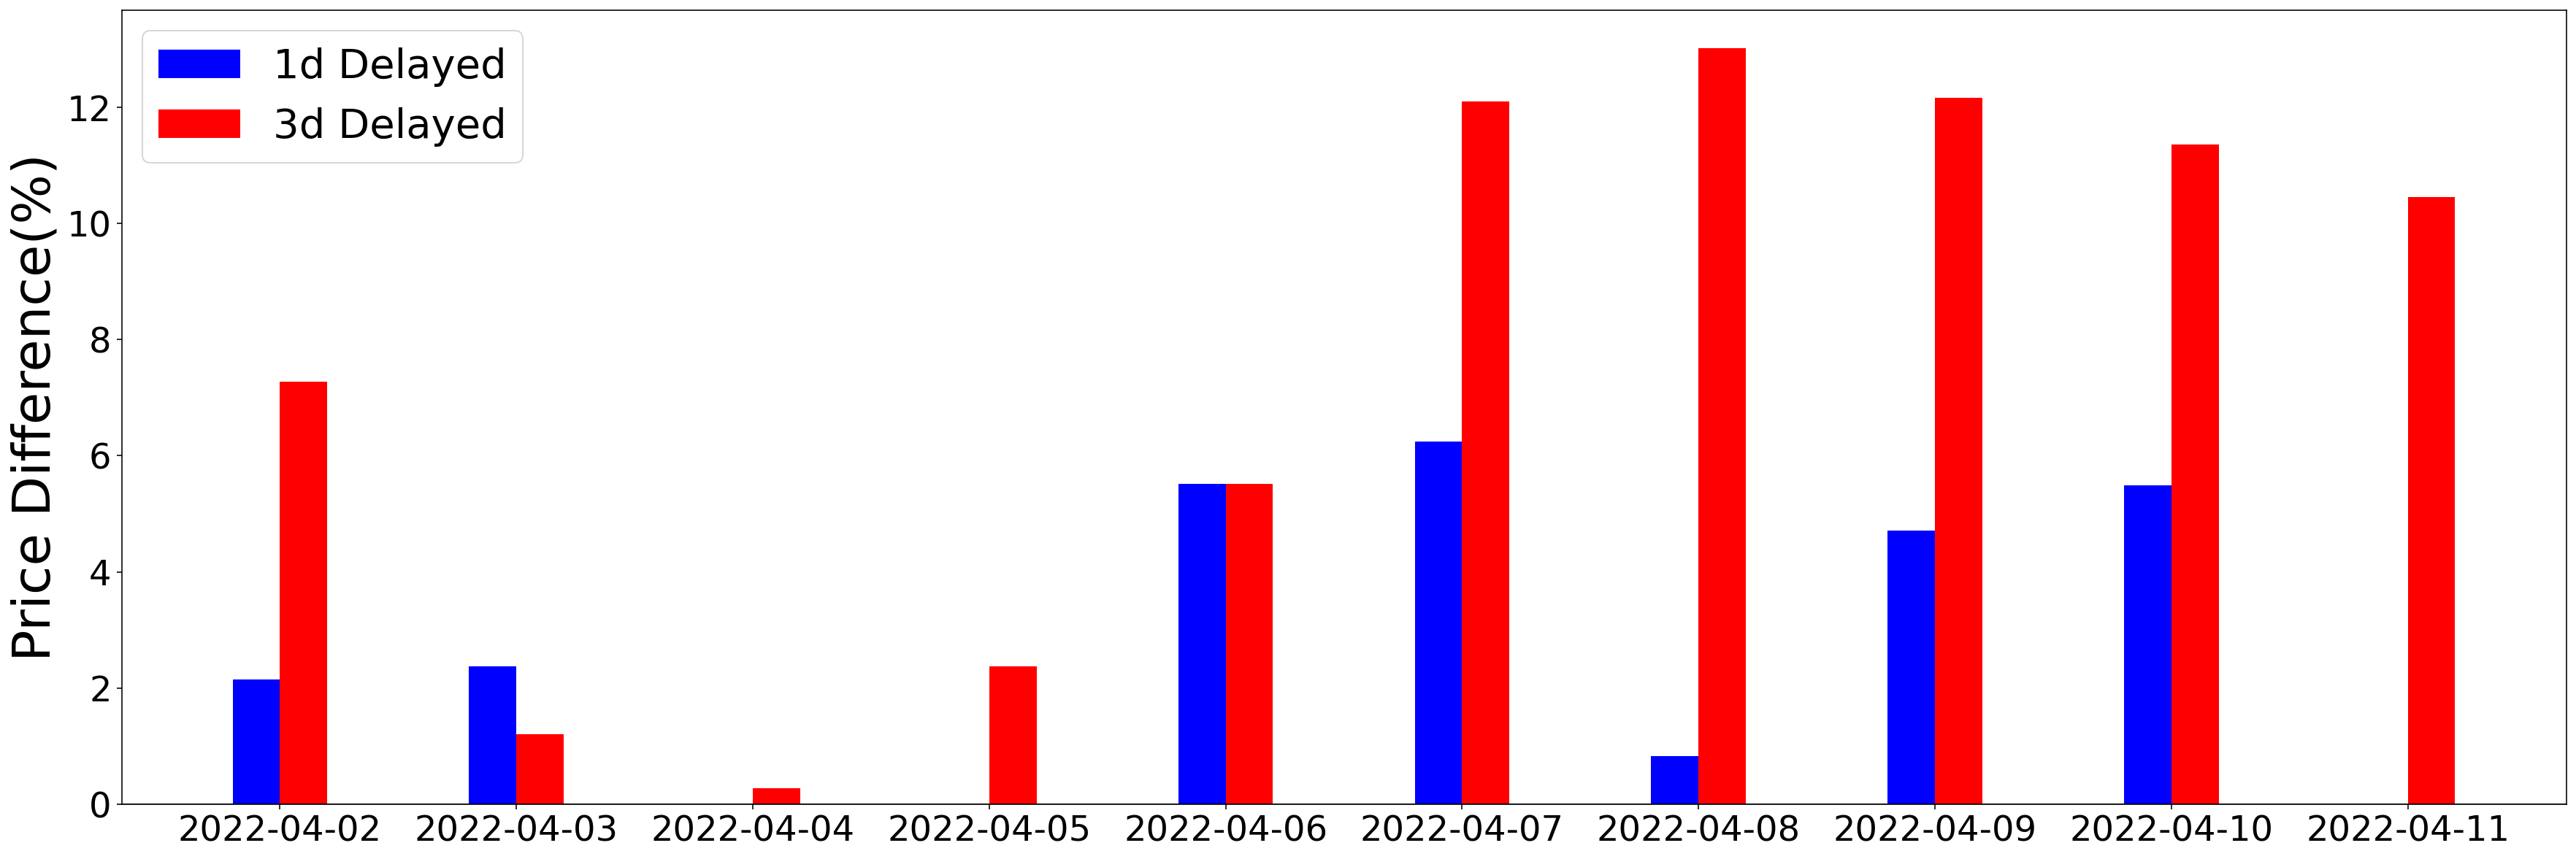

In [97]:
fig, ax1 = plt.subplots(figsize=(30,10))
ax1.bar(date_list[:10], price_diffs1[:10], color='blue', width=-0.2, align='edge', label='1d Delayed')
ax1.bar(date_list[:10], price_diffs3[:10], color='red', width=0.2, align='edge', label='3d Delayed')
ax1.set_ylabel('Price Difference(%)', fontsize=36)
ax1.tick_params(axis='y', labelsize=24)
# ax1.set_ylim(0, 100)
ax1.axhline(0, color='black')
ax1.legend(loc=0, fontsize=28)
ax1.tick_params(axis='x', labelsize=24)

<BarContainer object of 5 artists>

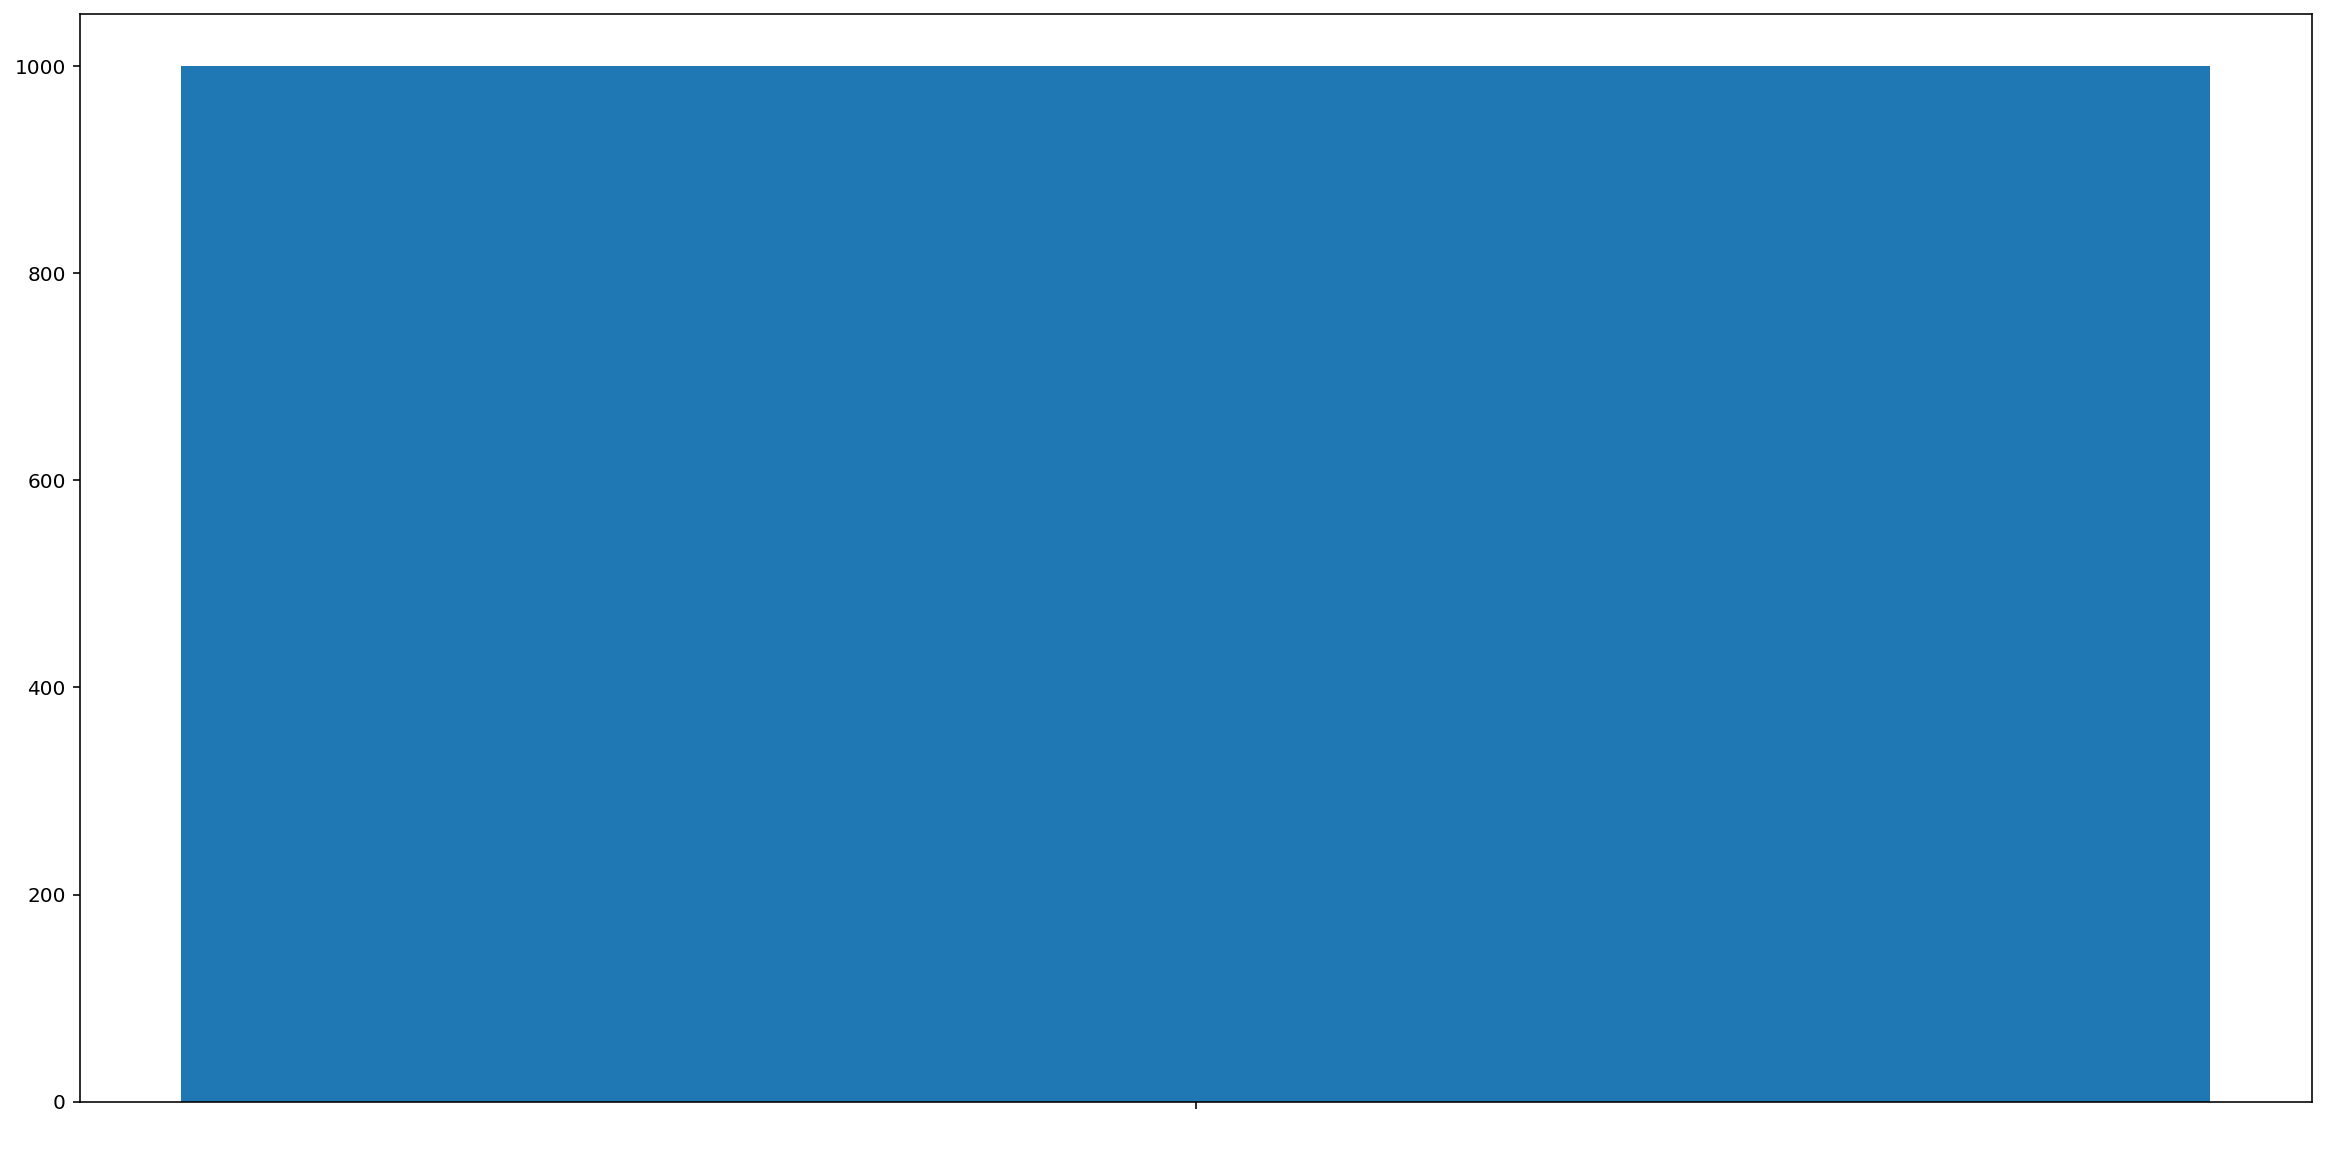

In [127]:
ex1 = [1000, 1000, 1000, 1000,1000]
# ex2 = [1000, 700]


fig, ax1 = plt.subplots(figsize=(20,10))

# ax1.bar(['モデル0', 'モデル1', 'モデル2', 'モデル3', 'モデル4'], ex2, color='red', width=0.2, align='edge', label='3d Delayed')
# ax1.set_ylabel('', fontsize=36, fontname="Hiragino Sans")
# ax1.tick_params(axis='y', labelsize=24)
# ax1.set_ylim(0, 100)
# ax1.axhline(0, color='black')
# ax1.legend(loc=0, fontsize=28)
# ax1.tick_params(axis='x', labelsize=24, fontname="Hiragino Sans")

### Apple

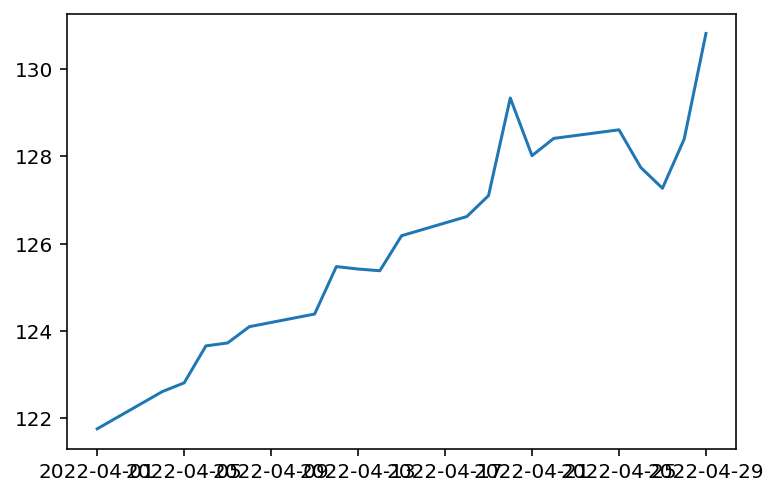

In [23]:
apple = "JPY=X"
start_date = "2022-04-02"
end_date = "2022-05-01"
start_date_delay = "2022-03-31"
end_date_delay = "2022-04-28"


prices2 = price_getter.get_close_price_all(apple, start_date, end_date)
prices_delay2 = price_getter.get_close_price_all(apple, start_date_delay, end_date_delay)
plt.plot(price_getter.get_close_price_all(apple, start_date, end_date))

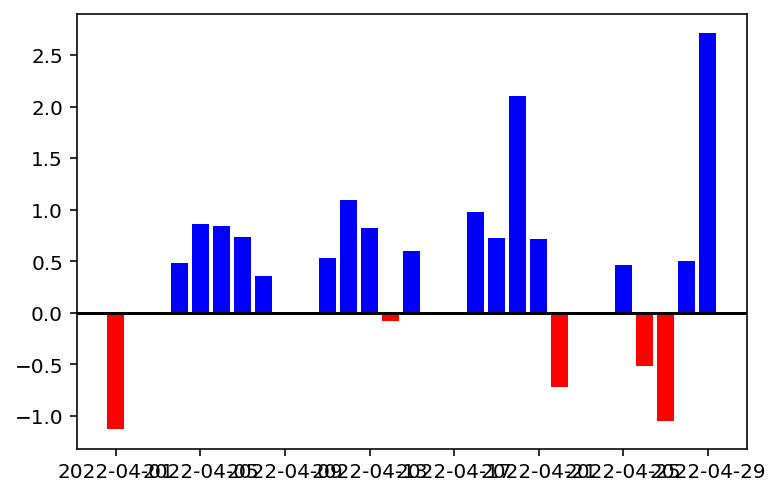

In [24]:
date_list2 = prices2.index
# plt.plot(date_list, prices)
price_diffs2 = (prices2.values - prices_delay2.values) / prices2.values * 100
price_diffs_color2 = ["red" if price_diff < 0 else "blue" for price_diff in price_diffs2]
plt.bar(date_list2, price_diffs2, color=price_diffs_color2)
plt.axhline(0, color='black')

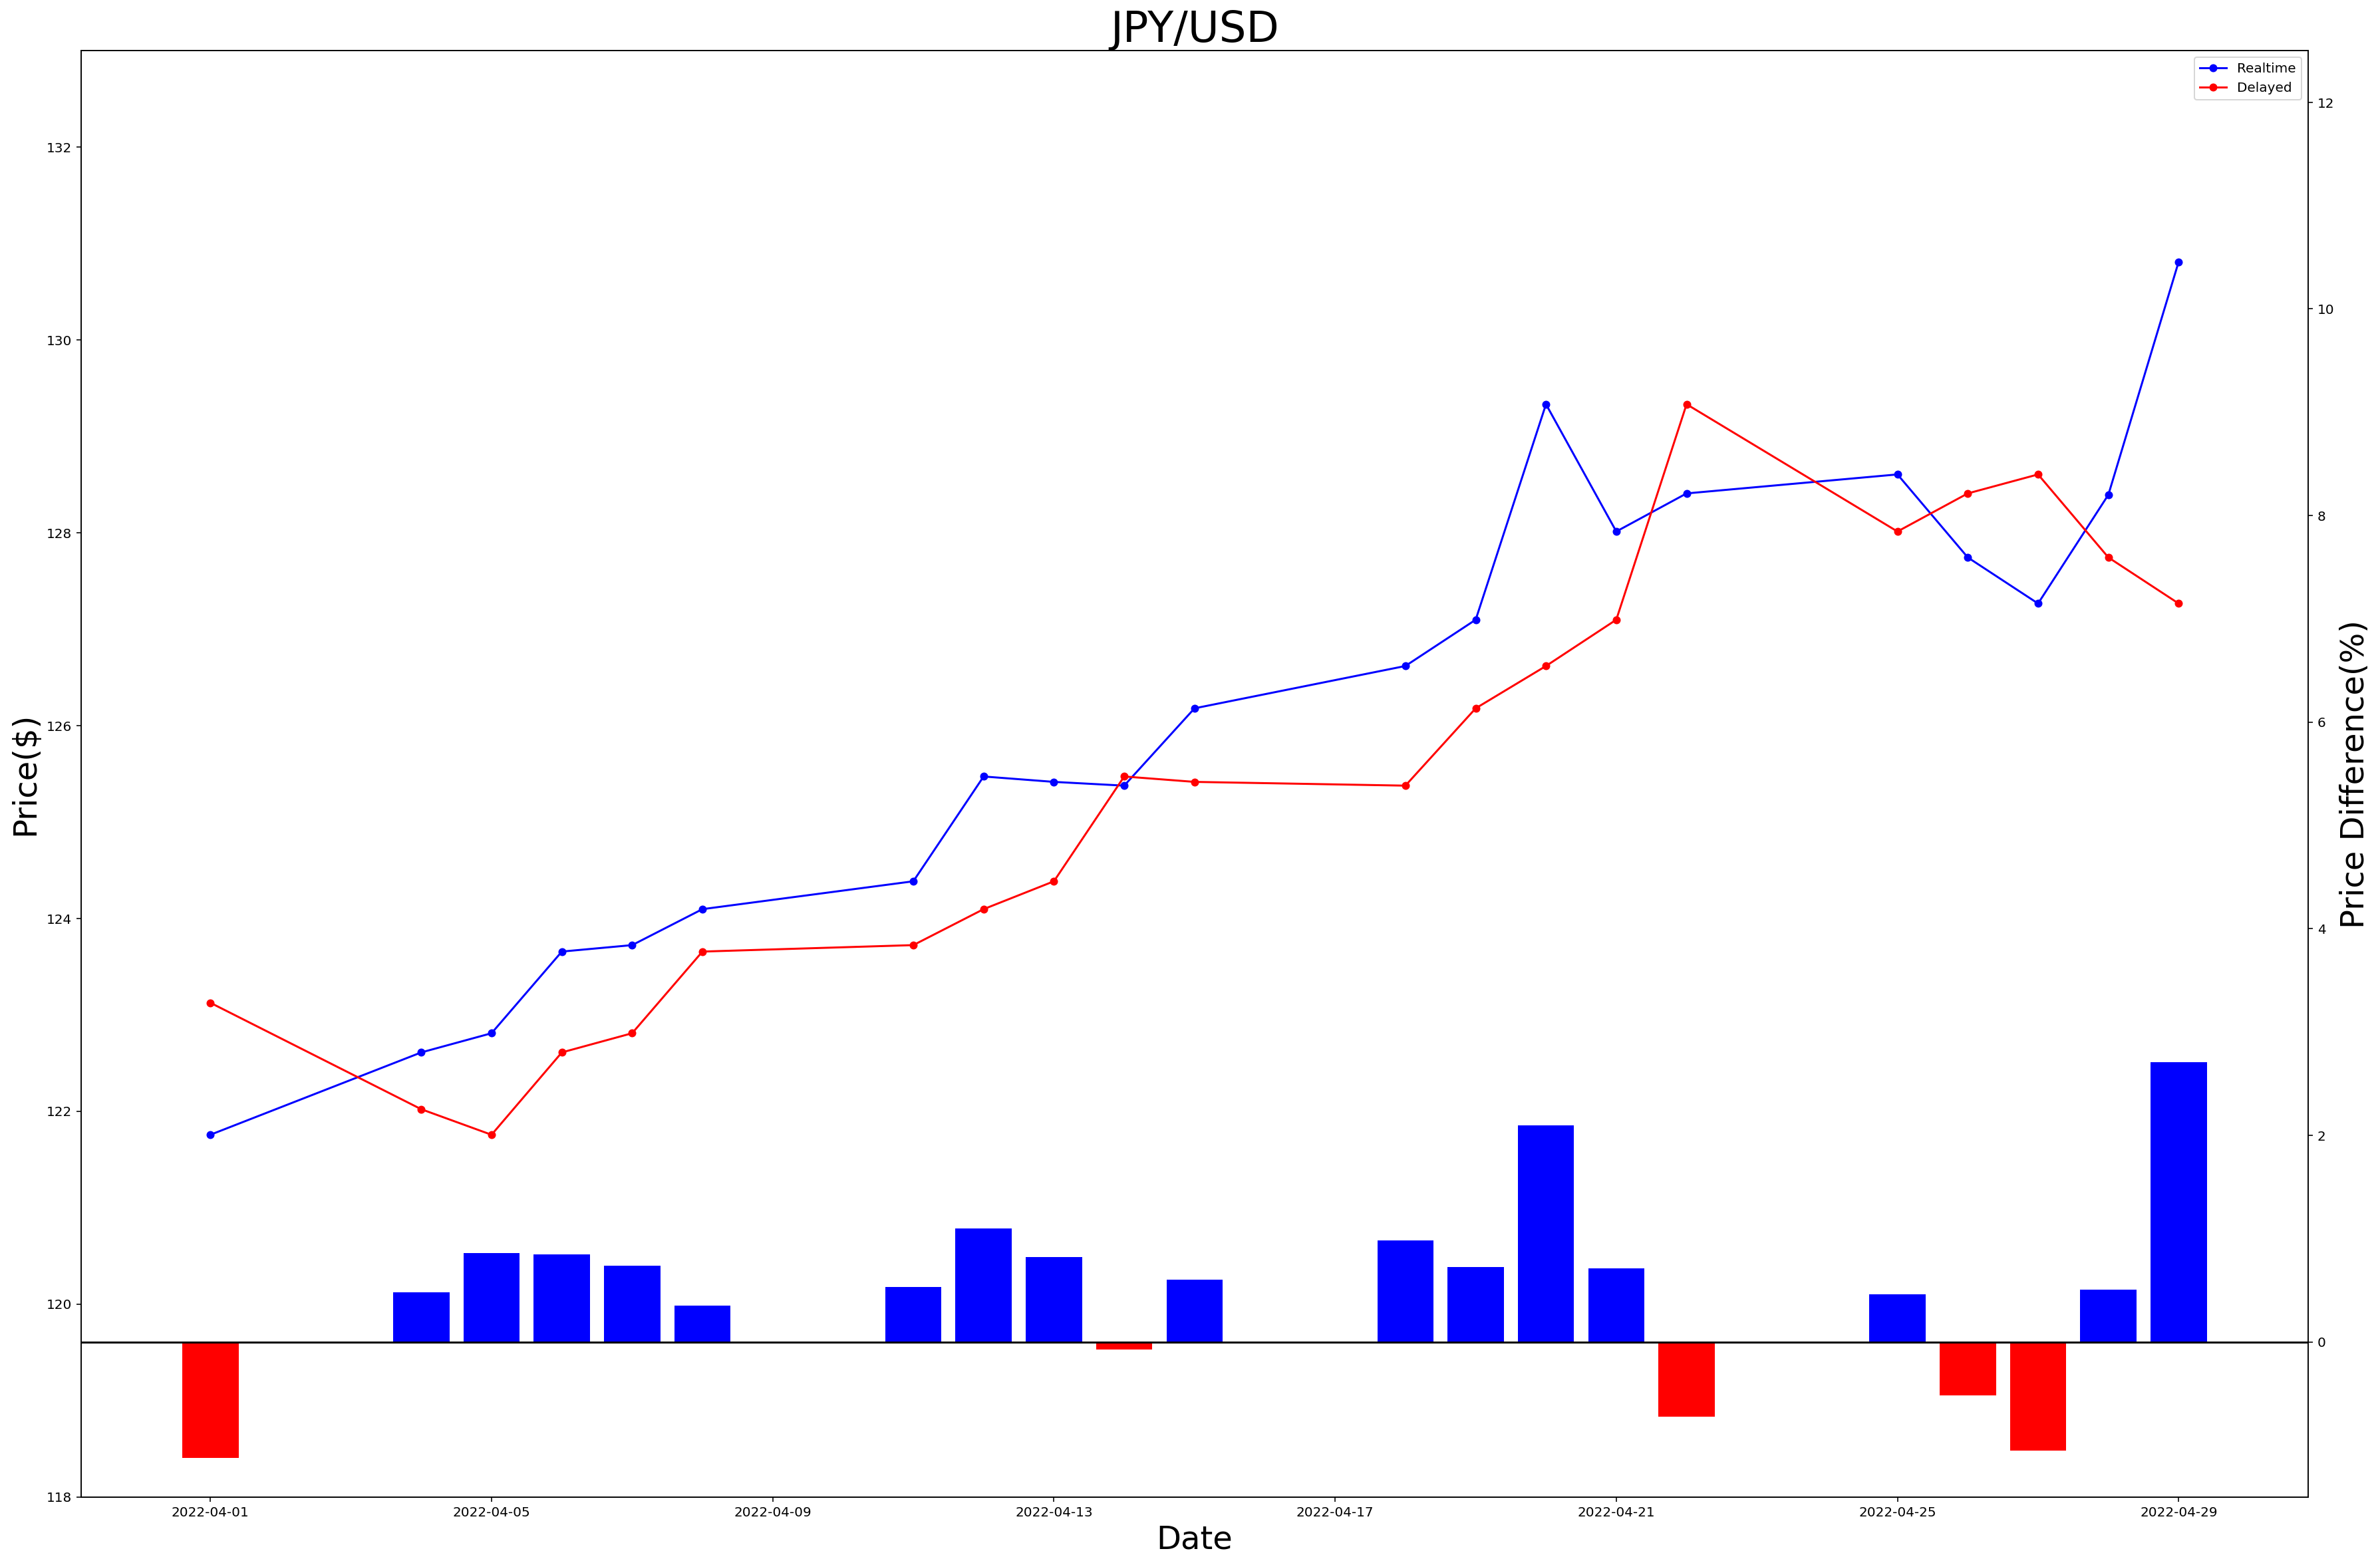

In [34]:
fig2, ax12 = plt.subplots(figsize=(30,20))
ax22 = ax12.twinx()

ax12.set_xlabel('Date', fontsize=24)  # x軸ラベル
ax12.set_ylabel('Price($)', fontsize=24)  # y軸ラベル
ax12.set_title('JPY/USD', fontsize=32) # グラフタイトル
ax12.plot(prices2, color="blue", marker='o', markersize=5, label="Realtime")
ax12.plot(date_list2, prices_delay2.values, marker='o', markersize=5, color="red", label="Delayed")
ax12.legend(loc=0)    # 凡例
ax12.set_ylim(118, 133)

ax22.bar(date_list2, price_diffs2, color=price_diffs_color2)
ax22.set_ylabel('Price Difference(%)', fontsize=24)
ax22.set_ylim(-1.5, 12.5)
ax22.axhline(0, color='black')